# RUN WITH footfall_ml_spatial 

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from shapely.geometry import Point
import geopandas as gpd
import folium
import matplotlib as mpl
import matplotlib.pyplot as plt
from random import randint
import branca.colormap as cm
import matplotlib.colors as colors
import contextily as cx

def create_other_features_gdf(fp):
    df = pd.read_csv(fp)
    geometry = [Point(xy) for xy in zip(df.Longitude, df.Latitude)]
    gdf = gpd.GeoDataFrame(df, geometry=geometry)
    return gdf

### Read in sensor data

In [3]:
melbourne_sensors = pd.read_csv("../Data/FootfallData/melbourne_locations.csv")
melbourne_sensors.rename(columns={'sensor_description': 'Name'}, inplace = True)
melbourne_sensors = melbourne_sensors.drop_duplicates('sensor_id', keep='first')

In [4]:
if 'Start' not in  melbourne_sensors.columns:
    sensors_dates_covered = pd.read_csv("../Cleaned_data/SensorData/sensors_dates_covered.csv")
    melbourne_sensors = pd.merge(melbourne_sensors, sensors_dates_covered, on='sensor_id',  how='left')

### Plot

In [6]:
api = "6c2695a3-768a-4885-a408-5770a99f5269"

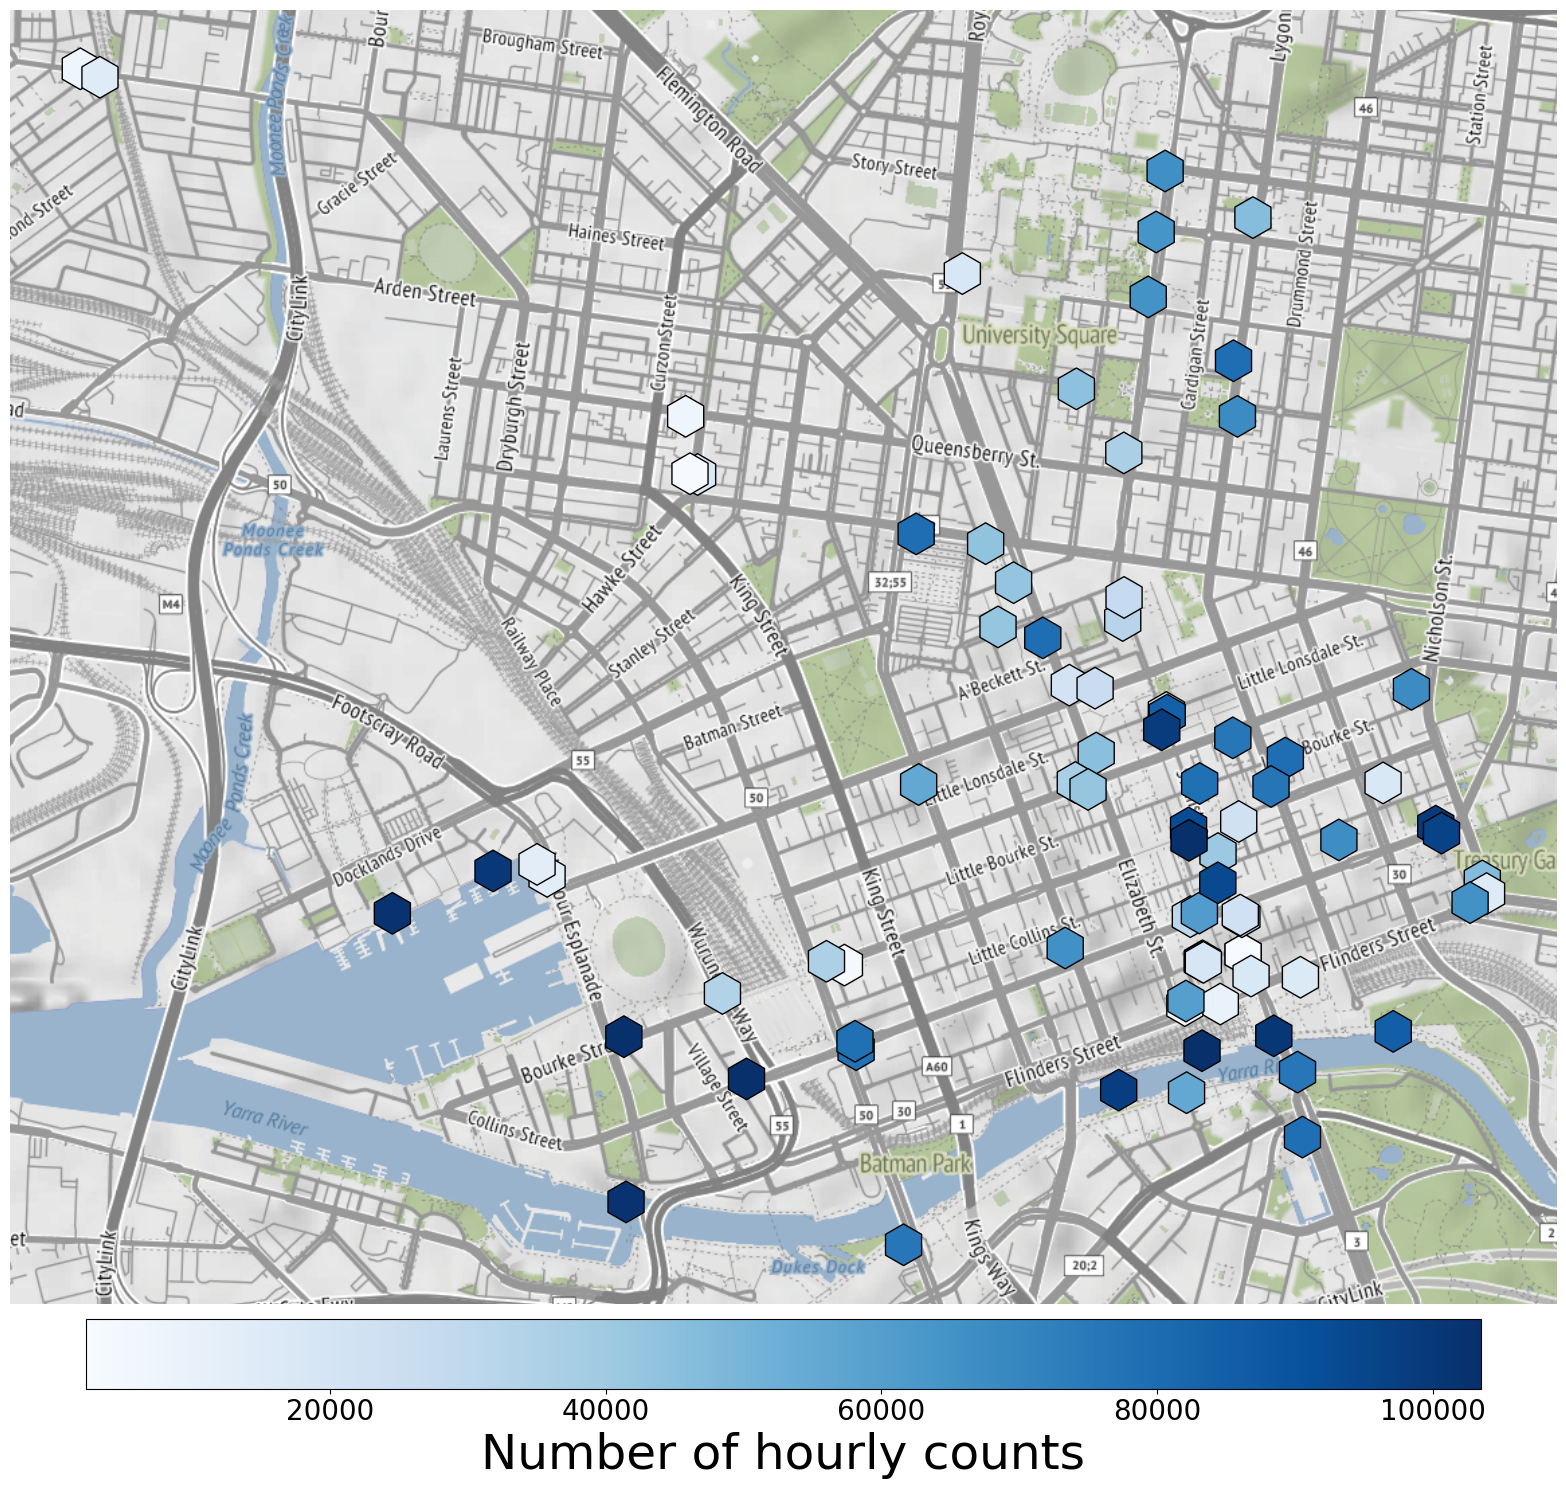

In [7]:
geometry = [Point(xy) for xy in zip(melbourne_sensors.Longitude, melbourne_sensors.Latitude)]
gdf = gpd.GeoDataFrame(melbourne_sensors, geometry=geometry)
gdf = gdf.set_crs('EPSG:4326')
gdf = gdf.to_crs('epsg:3857')

fig, ax = plt.subplots(figsize=(20,20))
gdf.plot(column=gdf.Values_per_sensor, ax = ax, markersize = 900,edgecolor = 'black', cmap='Blues', marker='h', legend = True, 
         legend_kwds={'shrink': 0.9, 'pad':0.01, 'label':'Number of hourly counts', 
                      "orientation": "horizontal"})

# Change font size on legend
cb_ax = fig.axes[1]
cb_ax.tick_params(labelsize=20)
plt.rcParams.update({'font.size': 35}) # legend title size

# gdf2.plot(ax = ax, markersize = 300,color='green')
# cx.add_basemap(ax,  url = cx.providers.OpenStreetMap.BlackAndWhite, zorder= )    
cx.add_basemap(ax, source='https://tiles.stadiamaps.com/tiles/stamen_terrain/{z}/{x}/{y}{r}.png?api_key='+api)
ax.axis('off')
ax.set_axis_off()
# plt.rc('legend',fontsize=500) # using a size in points

# fig.savefig("SensorLocations_bzh.PNG", bbox_inches="tight" )